In [2]:
import pandas as pd
import plotly.express as px


In [3]:
df = pd.read_csv('Data Samples\data.csv')

In [4]:
df

,image,label
0,Data Samples\DataSamples-1\39.jpg,FORWARD
1,Data Samples\DataSamples-1\40.jpg,FORWARD
2,Data Samples\DataSamples-1\41.jpg,FORWARD
3,Data Samples\DataSamples-1\42.jpg,FORWARD
4,Data Samples\DataSamples-1\43.jpg,FORWARD
...,...,...
10861,Data Samples\DataSamples-8\1473.jpg,FORWARD
10862,Data Samples\DataSamples-8\1474.jpg,FORWARD
10863,Data Samples\DataSamples-8\1475.jpg,FORWARD
10864,Data Samples\DataSamples-8\1476.jpg,FORWARD


In [5]:
df['label'].value_counts()

FORWARD    9755
RIGHT       762
LEFT        349
Name: label, dtype: int64

In [6]:
percentage = df.label.value_counts(normalize=True)*100
pielabels = ["Forward","Right", "Left"]

# Plot PieChart with Ploty library
f1 = px.pie(values= percentage, names= pielabels, title="Percentage of package bought and not bought")
f1.update_traces(textposition="inside", textinfo="percent+label")
f1.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
f1.show()

In [7]:
import cv2
def read_image(image):
    img_array = cv2.imread(image)
    return img_array

In [8]:
df['label'] = df['label'].replace({'FORWARD': 0, 'LEFT': 1, 'RIGHT':2})

In [9]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

image1 = cv2.imread(df.iloc[0]['image'])
image2 = cv2.imread(df.iloc[2]['image'])

print("MSE: ", mse(image1,image2))
print("RMSE: ", rmse(image1, image2))
print("PSNR: ", psnr(image1, image2))
print("SSIM: ", ssim(image1, image2))
print("UQI: ", uqi(image1, image2))
print("ERGAS: ", ergas(image1, image2))
print("SCC: ", scc(image1, image2))
print("RASE: ", rase(image1, image2))
print("SAM: ", sam(image1, image2))
print("VIF: ", vifp(image1, image2))

MSE:  437.8998107910156
RMSE:  20.926055786770128
PSNR:  21.717056033269277
SSIM:  (0.6761766030138284, 0.7056590800376784)
UQI:  0.7141679282667296
ERGAS:  89312.85311892981
SCC:  0.03201031329234174
RASE:  12891.199947576908
SAM:  0.9301452857220626
VIF:  0.01256801970435417


In [10]:
mse_list = []
mse_list.append(100)

for i in range(0, (df.shape[0] - 1)):
    image1 = cv2.imread(df.iloc[i]['image'])
    image2 = cv2.imread(df.iloc[i + 1]['image'])
    mse_list.append(mse(image1,image2))



print("MSE: ", mse(image1,image2))
print("RMSE: ", rmse(image1, image2))
print("PSNR: ", psnr(image1, image2))
print("SSIM: ", ssim(image1, image2))
print("UQI: ", uqi(image1, image2))
print("ERGAS: ", ergas(image1, image2))
print("SCC: ", scc(image1, image2))
print("RASE: ", rase(image1, image2))
print("SAM: ", sam(image1, image2))
print("VIF: ", vifp(image1, image2))

MSE:  359.7842102050781
RMSE:  18.96797854820271
PSNR:  22.57038261256038
SSIM:  (0.7586406683707262, 0.759353684981828)
UQI:  0.9910150684833164
ERGAS:  3483.470654695925
SCC:  -0.044755544678914065
RASE:  502.7956800507135
SAM:  0.1420331512179031
VIF:  0.1845657376954004


In [11]:
df['mse'] = mse_list

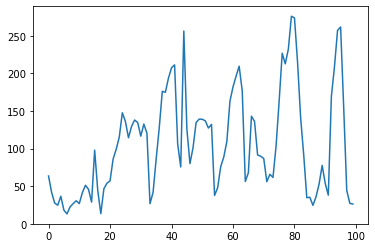

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(mse_list[100:200])
plt.show()

In [13]:
df.shape
df1 = df.copy()

In [14]:
df2 = (df1.loc[((df1['mse'] < 200) & (df1['label'] == 0 ))])

In [15]:
df2.shape

(2230, 3)

In [16]:
df1.drop(df2.index, inplace=True, axis=0)

In [17]:
df1['label'].value_counts()

0    7525
2     762
1     349
Name: label, dtype: int64

In [20]:
for i in range(0, df1.shape[0] - 1):
    if df1.iloc[i]['label'] != 0:
        df1.iloc[i - 1]['label'] = df1.iloc[i]['label']
        df1.iloc[i:i+3]['label'] = df1.iloc[i]['label']
        

C:\Users\wasim\AppData\Local\Temp\ipykernel_28332\627965954.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wasim\AppData\Local\Temp\ipykernel_28332\627965954.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df1['label'].value_counts()
df1.drop(columns=['mse'], inplace=True)

KeyError: "['mse'] not found in axis"

In [72]:
df_forward = df1.loc[df1['label'] == 0]
df_forward = df_forward.sample(frac=1).reset_index(drop=True)
df_forward = df_forward[:1000]

In [28]:
df_left = df1.loc[df1['label'] == 1]

In [29]:
df_right = df1.loc[df1['label'] == 2]

In [37]:
df_right['image']

15         Data Samples\DataSamples-1\54.jpg
28         Data Samples\DataSamples-1\67.jpg
42         Data Samples\DataSamples-1\83.jpg
43         Data Samples\DataSamples-1\84.jpg
44         Data Samples\DataSamples-1\85.jpg
                        ...                 
10795    Data Samples\DataSamples-8\1403.jpg
10796    Data Samples\DataSamples-8\1404.jpg
10819    Data Samples\DataSamples-8\1429.jpg
10853    Data Samples\DataSamples-8\1465.jpg
10854    Data Samples\DataSamples-8\1466.jpg
Name: image, Length: 762, dtype: object

In [69]:
import shutil, os

def copy_image(df_input, destination):
    for i in range(df_input.shape[0] - 1):
        shutil.copy(df_input.iloc[i]['image'], os.path.join(destination, f'{i}.jpg'))
        # print(os.path.join(destination, f'{i}.jpg'))

In [70]:
copy_image(df_left, r"C:\Users\wasim\line-following\left")

In [73]:
copy_image(df_forward, r"C:\Users\wasim\line-following\forward")

In [74]:
copy_image(df_right, r"C:\Users\wasim\line-following\right")